# Guassian Mixture Trajectory

## Packages and Presets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

## Mathematical Formulation

$$ \mathbf{x}_0 \sim p_0(\mathbf{x}) = \sum_{k=1}^K \pi_k\mathcal{N}(\mathbf{x}|\boldsymbol{\mu}_k, \sigma_k^2\mathbf{I}) $$

$$ \mathbf{x}_t \sim p_t(\mathbf{x}) = \sum_{k=1}^K \pi_k\mathcal{N}(\mathbf{x}|\sqrt{\bar{\alpha}_t}\boldsymbol{\mu}_k, (1-\bar{\alpha}_t)\mathbf{I} + \bar{\alpha}_t\sigma_k^2\mathbf{I}) $$

$$ = \sum_{k=1}^K \pi_k\mathcal{N}(\mathbf{x}|\sqrt{\alpha^t}\boldsymbol{\mu}_k, (1-\alpha^t)\mathbf{I} + \alpha^t\sigma_k^2\mathbf{I}), \quad \text{if } \alpha_t = \alpha \text{ so that } \bar{\alpha}_t = \prod_{i=1}^t \alpha = \alpha^t $$

$$ \mathbf{x}_t = \sqrt{\alpha_t}\mathbf{x}_{t-1} + \sqrt{1-\alpha_t}\boldsymbol{\epsilon}, \quad \boldsymbol{\epsilon} \sim \mathcal{N}(0, \mathbf{I}) $$

## Simulation

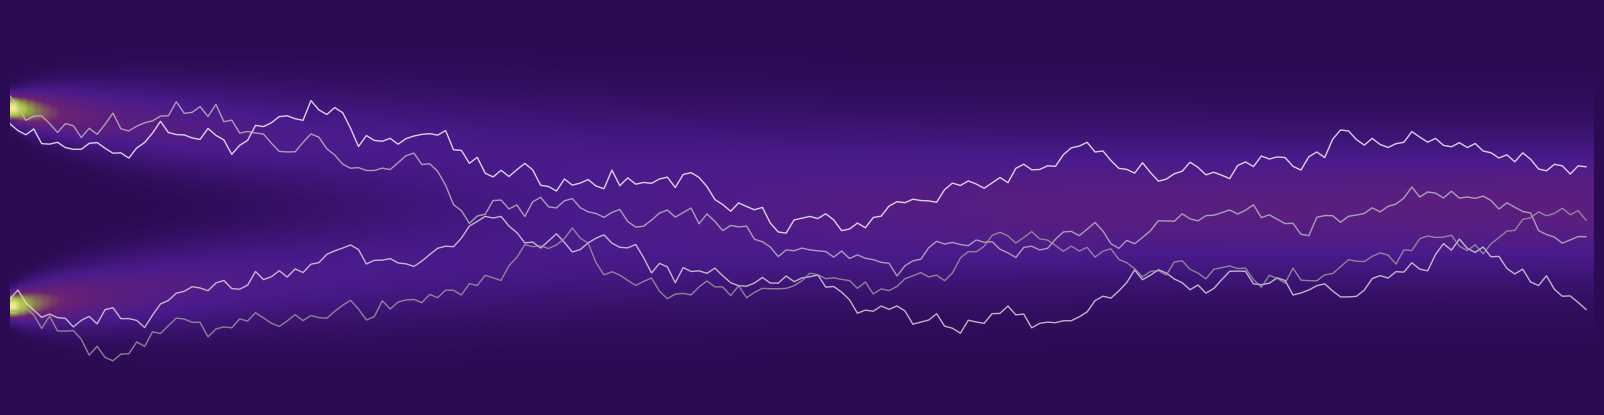

In [ ]:
np.random.seed(69)

# Parameters matching the equation
T = 200
NSIM = 4  # Number of sample paths
alpha = 0.98  # Higher alpha for slower convergence
beta = np.sqrt(1 - alpha)  # Correct scaling factor for noise

# Initialize arrays
x = np.zeros((T, NSIM))

# Initial mixture of two Gaussians
p1 = 0.5
indicator = np.random.binomial(1, p1, size=NSIM)
x[0, :] = (1 - indicator) * np.random.normal(
    2, 0.2, size=NSIM
) + indicator * np.random.normal(-2, 0.2, size=NSIM)

# Generate paths according to the equation
# x_t = sqrt(α)x_{t-1} + sqrt(1-α)ε, ε ~ N(0,1)
for t in range(1, T):
    x[t, :] = np.sqrt(alpha) * x[t - 1, :] + beta * np.random.normal(0, 1, size=NSIM)

# Create probability density grid
x_grid = np.linspace(-4, 4, 500)
t_grid = np.arange(T)
probs = np.zeros((len(x_grid), T))

# Calculate probability evolution
for t in range(T):
    alpha_t = alpha**t
    beta_t = 1 - alpha_t

    # Mixture of two Gaussians evolving over time
    probs[:, t] = p1 * np.exp(
        -0.5 * (x_grid - np.sqrt(alpha_t) * 2) ** 2 / (beta_t + 0.04)
    ) / np.sqrt(2 * np.pi * (beta_t + 0.04)) + (1 - p1) * np.exp(
        -0.5 * (x_grid + np.sqrt(alpha_t) * 2) ** 2 / (beta_t + 0.04)
    ) / np.sqrt(
        2 * np.pi * (beta_t + 0.04)
    )

# Create figure with appropriate dimensions
plt.figure(figsize=(15.84, 3.96), dpi=100)

# Custom colormap matching the textbook
colors = ["#2B0B52", "#4A1B8C", "#6B2273", "#9FBA3E", "#F2EA8B"]
n_bins = 256
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

# Plot background density
plt.imshow(probs, aspect="auto", extent=[0, T, -4, 4], origin="lower", cmap=cmap)

# Plot sample paths
path_colors = ["white", "#E0E0E0", "#C0C0C0", "#A0A0A0"]
for i in range(NSIM):
    plt.plot(x[:, i], color=path_colors[i], alpha=0.8, linewidth=1.0)

# Style the plot
plt.gca().set_facecolor("#2B0B52")
plt.gcf().set_facecolor("#2B0B52")

# Remove axes, labels, and ticks
plt.xticks([])
plt.yticks([])
plt.box(False)

# Adjust layout
plt.tight_layout(pad=0)
plt.savefig(
    "linkedin_banner.png",
    dpi=100,
    bbox_inches="tight",
    pad_inches=0,
    facecolor="#2B0B52",
    edgecolor="none",
)
plt.show()
plt.close()